Mounted at /content/drive


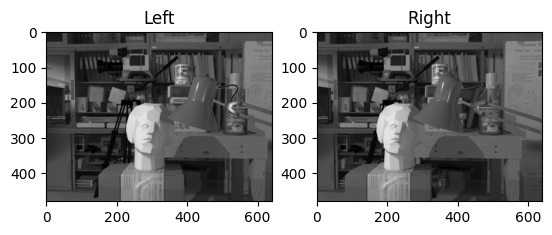

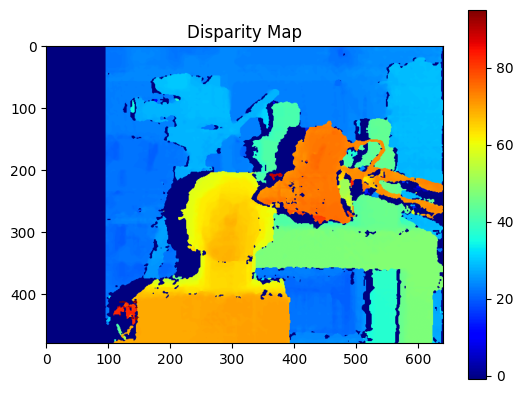

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')

left = cv2.imread("/content/drive/MyDrive/Amazon project/img/image_from_left_camera.png", cv2.IMREAD_GRAYSCALE)
right = cv2.imread("/content/drive/MyDrive/Amazon project/img/image_from_right_camera.png", cv2.IMREAD_GRAYSCALE)


plt.subplot(1,2,1); plt.imshow(left, cmap='gray'); plt.title("Left")
plt.subplot(1,2,2); plt.imshow(right, cmap='gray'); plt.title("Right")
plt.show()

#-----------------------create disparity map--------------------------
numDisparities = 16 * 6
blockSize = 5

stereo = cv2.StereoSGBM_create(
    minDisparity=0,
    numDisparities=numDisparities,
    blockSize=blockSize,
    P1=8 * blockSize**2,
    P2=32 * blockSize**2,
    uniquenessRatio=10,
    speckleWindowSize=100,
    speckleRange=31
)

disparity = stereo.compute(left,right).astype(np.float32) / 16.0
# disparity[disparity < 0] = np.nan

plt.imshow(disparity, cmap='jet')
plt.colorbar()
plt.title("Disparity Map")
plt.show()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


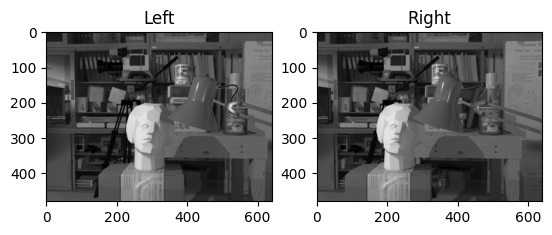

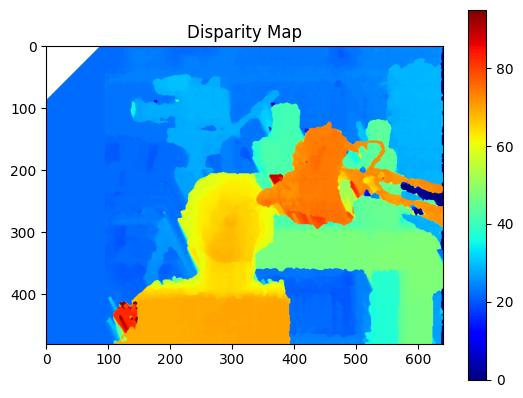

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')

left = cv2.imread("/content/drive/MyDrive/Amazon project/img/image_from_left_camera.png", cv2.IMREAD_GRAYSCALE)
right = cv2.imread("/content/drive/MyDrive/Amazon project/img/image_from_right_camera.png", cv2.IMREAD_GRAYSCALE)


plt.subplot(1,2,1); plt.imshow(left, cmap='gray'); plt.title("Left")
plt.subplot(1,2,2); plt.imshow(right, cmap='gray'); plt.title("Right")
plt.show()

#-----------------------create disparity map--------------------------
numDisparities = 16 * 6
blockSize = 5

stereo = cv2.StereoSGBM_create(
    minDisparity=0,
    numDisparities=numDisparities,
    blockSize=blockSize,
    P1=8 * blockSize**2,
    P2=32 * blockSize**2,
    uniquenessRatio=10,
    speckleWindowSize=100,
    speckleRange=31
)

disp = stereo.compute(left,right).astype(np.float32) / 16.0
disp[disp < 0] = np.nan

def fill_holes_local(disp, window=3, max_iter=5):
    """
    disp: np.ndarray, NaN
    window: 探索する周囲ピクセルの幅 (window x window)
    max_iter: 繰り返し回数
    """
    disp_filled = disp.copy()
    h, w = disp.shape
    r = window // 2

    for _ in range(max_iter):
        nan_mask = np.isnan(disp_filled)
        if not nan_mask.any():
            break

        ys, xs = np.where(nan_mask)
        for y, x in zip(ys, xs):
            y0, y1 = max(0, y - r), min(h, y + r + 1)
            x0, x1 = max(0, x - r), min(w, x + r + 1)
            patch = disp_filled[y0:y1, x0:x1]
            valid = patch[~np.isnan(patch)]
            if valid.size > 0:
                disp_filled[y, x] = np.median(valid)

    return disp_filled
disp_filled = fill_holes_local(disp, window=3, max_iter=5)


plt.imshow(disp_filled, cmap='jet')
plt.colorbar()
plt.title("Disparity Map")
plt.show()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


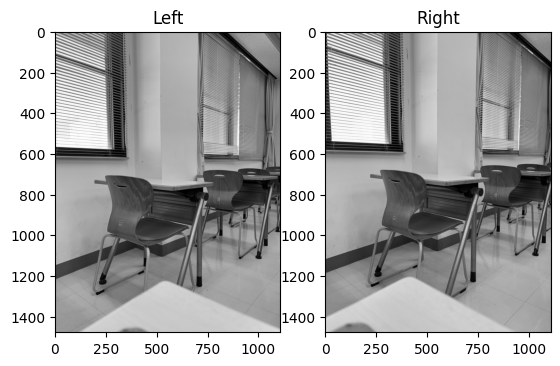

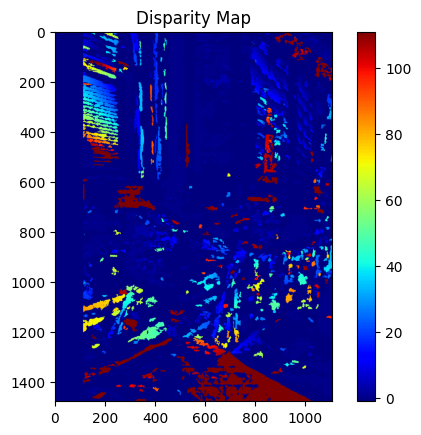

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')

left = cv2.imread("/content/drive/MyDrive/Amazon project/img/S__121528324_0.jpg", cv2.IMREAD_GRAYSCALE)
right = cv2.imread("/content/drive/MyDrive/Amazon project/img/S__121528323_0.jpg", cv2.IMREAD_GRAYSCALE)


plt.subplot(1,2,1); plt.imshow(left, cmap='gray'); plt.title("Left")
plt.subplot(1,2,2); plt.imshow(right, cmap='gray'); plt.title("Right")
plt.show()

#-----------------------create disparity map--------------------------
numDisparities = 16 * 7
blockSize = 11

stereo = cv2.StereoSGBM_create(
    minDisparity=0,
    numDisparities=numDisparities,
    blockSize=blockSize,
    P1=8 * blockSize**2,
    P2=32 * blockSize**2,
    uniquenessRatio=16,
    speckleWindowSize=100,
    speckleRange=31
)

disparity = stereo.compute(left,right).astype(np.float32) / 16.0
# disparity[disparity < 0] = np.nan

plt.imshow(disparity, cmap='jet')
plt.colorbar()
plt.title("Disparity Map")
plt.show()


In [ ]:
import cv2
import numpy as np
import glob
import os


CHECKERBOARD = (7, 7)
SQUARE_SIZE = 1.45

IMG_DIR = "/content/drive/MyDrive/Amazon project/dng_images"


objp = np.zeros((CHECKERBOARD[0] * CHECKERBOARD[1], 3), np.float32)
objp[:, :2] = np.mgrid[0:CHECKERBOARD[0], 0:CHECKERBOARD[1]].T.reshape(-1, 2)
objp *= SQUARE_SIZE

objpoints = []  # 3Dポイント
imgpoints = []  # 2Dポイント


jpg_files = glob.glob(os.path.join(IMG_DIR, "*.jpg"))
print(f"Found {len(jpg_files)} JPG files.")

if len(jpg_files) == 0:
    print("JPGが1枚も見つかりません。パスを確認してください。")

for fname in jpg_files:

    img = cv2.imread(fname)
    if img is None:
        print(f" Failed to read: {fname}")
        continue

    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    ret, corners = cv2.findChessboardCorners(gray, CHECKERBOARD, None)

    if ret:
        criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001)
        corners2 = cv2.cornerSubPix(gray, corners, (11, 11), (-1, -1), criteria)

        objpoints.append(objp)
        imgpoints.append(corners2)

        print(f" Detected corners: {os.path.basename(fname)}")
    else:
        print(f" Failed: {os.path.basename(fname)}")



ret, K, dist, rvecs, tvecs = cv2.calibrateCamera(
    objpoints, imgpoints, gray.shape[::-1], None, None
)

print("\n===== Calibration Results =====")
print("Intrinsic Matrix K:\n", K)
print("Distortion Coefficients:\n", dist)
print("Reprojection Error:", ret)


total_error = 0
errors = []

for i in range(len(objpoints)):
    imgpoints2, _ = cv2.projectPoints(objpoints[i], rvecs[i], tvecs[i], K, dist)
    error = cv2.norm(imgpoints[i], imgpoints2, cv2.NORM_L2) / len(imgpoints2)
    errors.append(error)
    total_error += error

mean_error = total_error / len(objpoints)

print("\n=====  Evaluation =====")
for i, e in enumerate(errors):
    print(f"Image {i+1}: {e:.4f} px")

print(f"\nMean Reprojection Error: {mean_error:.4f} px")

np.save("intrinsic.npy", K)
np.save("distortion.npy", dist)

print("\nSaved: intrinsic.npy / distortion.npy")

Found 73 JPG files.
 Detected corners: 7.jpg
 Detected corners: 6.jpg
 Detected corners: 5.jpg
 Detected corners: 22.jpg
 Detected corners: 10.jpg
 Detected corners: 23.jpg
 Detected corners: 18.jpg
 Detected corners: 17.jpg
 Detected corners: 15.jpg
 Detected corners: 19.jpg
 Detected corners: 21.jpg
 Detected corners: 16.jpg
 Detected corners: 20.jpg
 Detected corners: 9.jpg
 Detected corners: 8.jpg
 Detected corners: 12.jpg
 Detected corners: 14.jpg
 Detected corners: 4.jpg
 Detected corners: 11.jpg
 Detected corners: 1.jpg
 Detected corners: 13.jpg
 Detected corners: 3.jpg
 Detected corners: 2.jpg
 Detected corners: S__121413669_0.jpg
 Detected corners: S__121413671_0.jpg
 Detected corners: S__121413672_0.jpg
 Detected corners: S__121413673_0.jpg
 Detected corners: S__121413674_0.jpg
 Detected corners: S__121413678_0.jpg
 Detected corners: S__121413676_0.jpg
 Detected corners: S__121413670_0.jpg
 Detected corners: S__121413675_0.jpg
 Detected corners: S__121413677_0.jpg
 Detected c

In [ ]:
np.save("intrinsic.npy", K)
np.save("distortion.npy", dist)

print("Saved: intrinsic.npy / distortion.npy")


## rectification code
 I used ideal entrix matrix here.

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Estimated vertical shift dy: -20


<Figure size 1400x600 with 0 Axes>

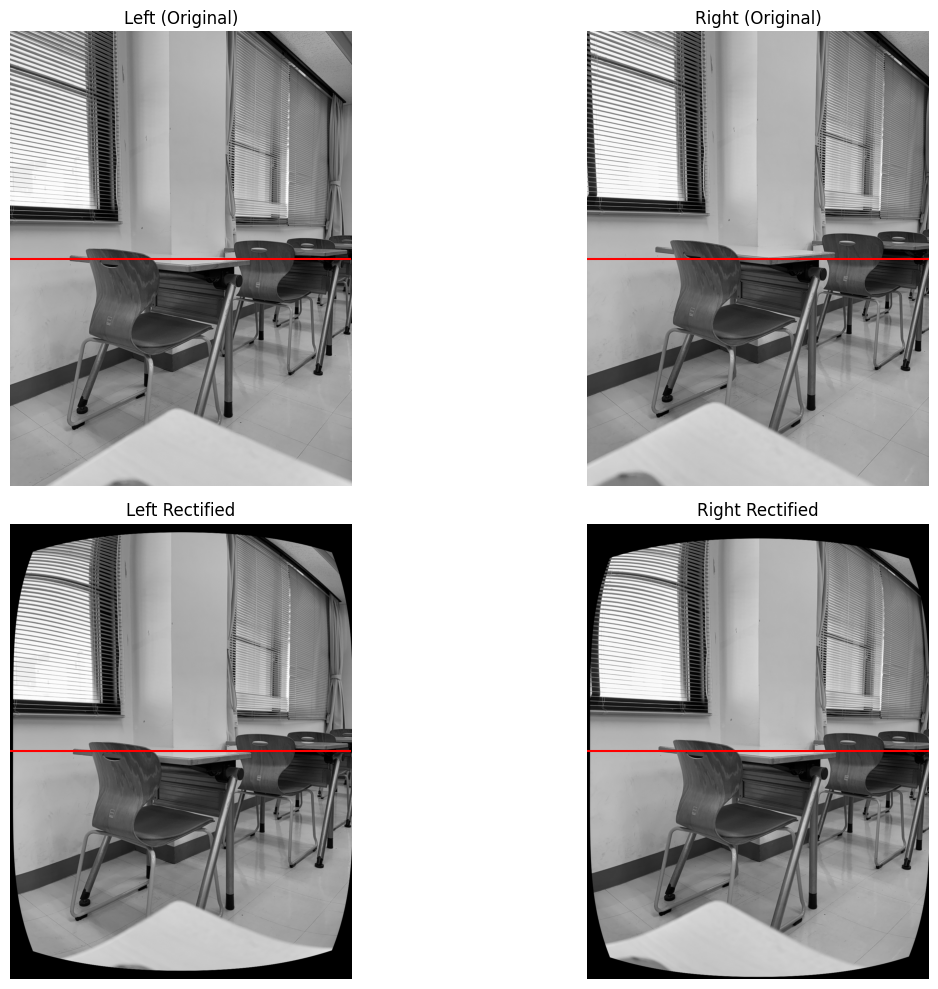

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive

drive.mount('/content/drive')

left_img  = cv2.imread("/content/drive/MyDrive/Amazon project/img/S__121528324_0.jpg",
                       cv2.IMREAD_GRAYSCALE)

right_img = cv2.imread("/content/drive/MyDrive/Amazon project/img/S__121528323_0.jpg",
                       cv2.IMREAD_GRAYSCALE)

assert left_img is not None, "Left image not loaded"
assert right_img is not None, "Right image not loaded"

h, w = left_img.shape

K = np.array([
    [1.14320470e+03, 0, 5.47809309e+02],
    [0, 1.14286571e+03, 7.37525658e+02],
    [0, 0, 1]
], dtype=np.float64)

D = np.array([2.88277327e-01, -2.11361845e+00,
               -1.15061269e-03, -4.07155689e-04,
               4.23811514e+00], dtype=np.float64)


baseline = 0.04  # 40mm

R = np.eye(3, dtype=np.float64)
T = np.array([-baseline, 0, 0], dtype=np.float64).reshape(3,1)


image_size = (w, h)

R1, R2, P1, P2, Q, _, _ = cv2.stereoRectify(
    K, D, K, D, image_size, R, T, flags=cv2.CALIB_ZERO_DISPARITY
)




map1_l, map2_l = cv2.initUndistortRectifyMap(
    K, D, R1, P1, image_size, cv2.CV_32FC1
)

map1_r, map2_r = cv2.initUndistortRectifyMap(
    K, D, R2, P2, image_size, cv2.CV_32FC1
)


left_rect  = cv2.remap(left_img,  map1_l, map2_l, cv2.INTER_LINEAR)
right_rect = cv2.remap(right_img, map1_r, map2_r, cv2.INTER_LINEAR)




def estimate_y_shift(left, right, search_range=20):
    h, w = left.shape
    y = h // 2

    patch_left = left[y-50:y+50, w//4:3*w//4]

    best_shift = 0
    best_score = 1e9

    for dy in range(-search_range, search_range + 1):
        y_start = y - 50 + dy
        y_end   = y + 50 + dy

        if y_start < 0 or y_end > h:
            continue

        patch_right = right[y_start:y_end, w//4:3*w//4]

#SSE (Sum of Squared Errors)
        score = np.sum((patch_left - patch_right) ** 2)

        if score < best_score:
            best_score = score
            best_shift = dy

    return best_shift

-
dy = estimate_y_shift(left_rect, right_rect)
print("Estimated vertical shift dy:", dy)

M = np.float32([
    [1, 0, 0],
    [0, 1, -dy]
])
right_rect_shifted = cv2.warpAffine(right_rect, M, (w, h))


plt.figure(figsize=(14,6))

plt.figure(figsize=(14,10))

# 1行目: 元画像
plt.subplot(2,2,1)
plt.imshow(left_img, cmap='gray')
plt.axhline(y=h//2, color='r')
plt.title("Left (Original)")
plt.axis("off")

plt.subplot(2,2,2)
plt.imshow(right_img, cmap='gray')
plt.axhline(y=h//2, color='r')
plt.title("Right (Original)")
plt.axis("off")

# 2行目: Rectified
plt.subplot(2,2,3)
plt.imshow(left_rect, cmap='gray')
plt.axhline(y=h//2, color='r')
plt.title("Left Rectified")
plt.axis("off")

plt.subplot(2,2,4)
plt.imshow(right_rect_shifted, cmap='gray')
plt.axhline(y=h//2, color='r')
plt.title("Right Rectified")
plt.axis("off")

plt.tight_layout()
plt.show()



## Creating disparity maps Using rectified images

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


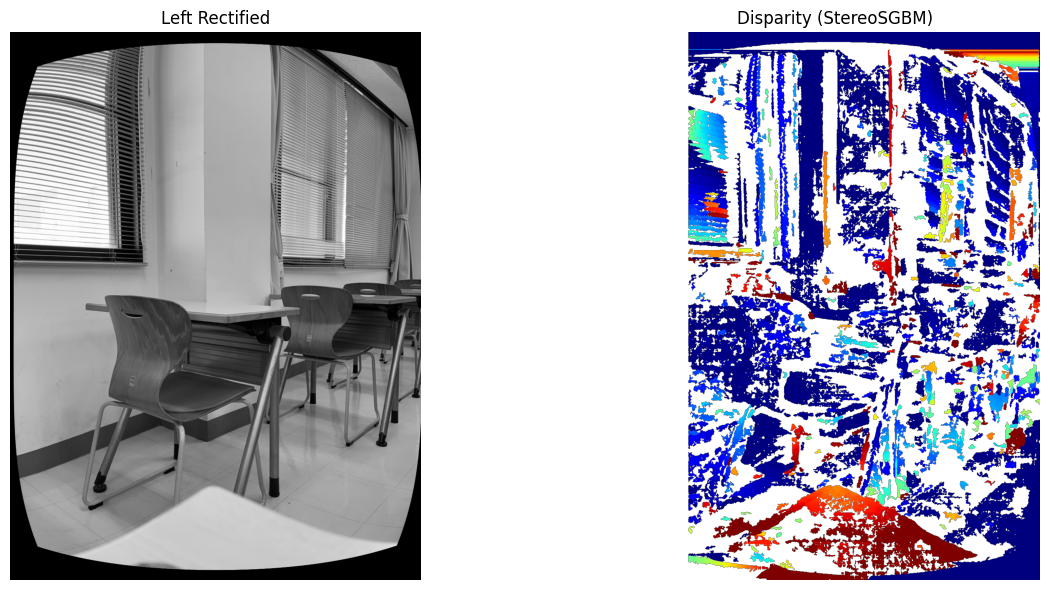

In [ ]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive


drive.mount('/content/drive')

# read rectified images
left_rect = cv2.imread("/content/drive/MyDrive/Amazon project/left_rectified.png", cv2.IMREAD_GRAYSCALE)
right_rect = cv2.imread("/content/drive/MyDrive/Amazon project/right_rectified.png", cv2.IMREAD_GRAYSCALE)

h, w = left_rect.shape

# creating disparity maps using StreoSGBM

min_disp = 0
num_disp = 16 *10
block_size = 11

stereo = cv2.StereoSGBM_create(
    minDisparity=min_disp,
    numDisparities=num_disp,
    blockSize=block_size,
    P1=8*1*block_size*block_size,
    P2=32*1*block_size*block_size,
    disp12MaxDiff=1,
    uniquenessRatio=5,
    speckleWindowSize=100,
    speckleRange=2
)

disp_sgbm = stereo.compute(left_rect, right_rect).astype(np.float32) / 16.0

disp_sgbm[disp_sgbm < 0] = np.nan


plt.figure(figsize=(14,6))

plt.subplot(1, 2, 1)
plt.imshow(left_rect, cmap="gray")
plt.title("Left Rectified")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(disp_sgbm, cmap="jet")
plt.title("Disparity (StereoSGBM)")
plt.axis("off")

plt.tight_layout()
plt.show()
